# Hotel Recommendation Machine Leanrning Project using TensorFlow

## Purpose
This project focuses on using collaborative filtering recommender system to predict what hotels to recommend to a user.

## Source
kaggle dataset from > https://www.kaggle.com/datafiniti/hotel-reviews?select=Datafiniti_Hotel_Reviews_Jun19.csv

or from  Datafiniti's Business Database. 

In [114]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/7282_1.csv


In [115]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [116]:
# We will load the dataset of hotel reviews from December 2018 through May 2019
#This is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. 
# The dataset includes hotel location, name, rating, review data, title, username, and more

latest_reviews = pd.read_csv("/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv", parse_dates=True)
previous_year_reviews = pd.read_csv("/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv", parse_dates=True)
hotel_reviews = pd.concat([latest_reviews,previous_year_reviews], axis=0, ignore_index=True)
hotel_reviews.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3.0,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3.0,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [117]:
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20000 non-null  object 
 1   dateAdded             20000 non-null  object 
 2   dateUpdated           20000 non-null  object 
 3   address               20000 non-null  object 
 4   categories            20000 non-null  object 
 5   primaryCategories     20000 non-null  object 
 6   city                  20000 non-null  object 
 7   country               20000 non-null  object 
 8   keys                  20000 non-null  object 
 9   latitude              20000 non-null  float64
 10  longitude             20000 non-null  float64
 11  name                  20000 non-null  object 
 12  postalCode            20000 non-null  object 
 13  province              20000 non-null  object 
 14  reviews.date          20000 non-null  object 
 15  reviews.dateAdded  

In [118]:
hotel_reviews.drop('reviews.dateAdded', axis=1, inplace=True)

In [119]:
#rename the hotel column
hotel_reviews.rename(columns={"name": "hotel_name"}, inplace=True)

hotel_name_column = hotel_reviews['hotel_name']
hotel_reviews.drop(labels=['hotel_name'], axis=1,inplace = True)
hotel_reviews.insert(0, 'hotel_name', hotel_name_column)

hotel_reviews.head()

,hotel_name,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,Best Western Plus South Coast Inn,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,...,2018-01-03T00:00:00Z,3.0,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,Best Western Carmel's Town House Lodge,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,...,2016-10-09T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,Best Western Carmel's Town House Lodge,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,...,2016-10-09T00:00:00Z,3.0,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,Best Western Carmel's Town House Lodge,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,...,2016-10-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,Best Western Carmel's Town House Lodge,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


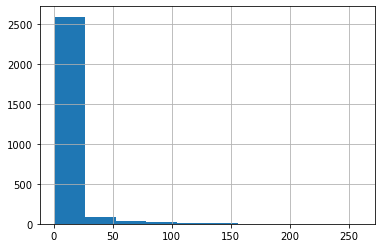

In [120]:
hotel_reviews.groupby('hotel_name')['reviews.rating'].count().hist();

In [121]:
rating_count = (hotel_reviews.
     groupby(by = ['hotel_name'])['reviews.rating'].
     count().
     reset_index().
     rename(columns = {'reviews.rating': 'hotel_ratings_count'})
     [['hotel_name', 'hotel_ratings_count']]
    )

threshold = 9

rating_count = rating_count.query('hotel_ratings_count >= @threshold')

user_rating = pd.merge(rating_count, hotel_reviews, left_on='hotel_name', right_on='hotel_name', how='left')

user_count = (user_rating.
     groupby(by = ['reviews.username'])['reviews.rating'].
     count().
     reset_index().
     rename(columns = {'reviews.rating': 'user_ratings_count'})
     [['reviews.username', 'user_ratings_count']]
    )

threshold = 5
user_count = user_count.query('user_ratings_count >= @threshold')

combined = user_rating.merge(user_count, left_on = 'reviews.username', right_on = 'reviews.username', how = 'inner')


print('Number of unique hotels: ', combined['hotel_name'].nunique())
print('Number of unique users: ', combined['reviews.username'].nunique())



Number of unique hotels:  213
Number of unique users:  81


We will start of using collaborative filtering techniques which looks at:


 >* Users who rate hotels in a similar manner share one or more hidden preferences.
 >* Users with shared preferences are likely to give ratings in the same way to the same hotels.

In [122]:
# Normalize rating feature

scaler = MinMaxScaler()
combined['reviews.rating'] = combined['reviews.rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(combined['reviews.rating'].values.reshape(-1,1)))
combined['reviews.rating'] = rating_scaled

In [123]:
# Then, build user, hotel matrix with three features:

combined = combined.drop_duplicates(['reviews.username', 'hotel_name'])
user_hotel_matrix = combined.pivot(index='reviews.username', columns='hotel_name', values='reviews.rating')
user_hotel_matrix.fillna(0, inplace=True)
users = user_hotel_matrix.index.tolist()
hotels = user_hotel_matrix.columns.tolist()
user_hotel_matrix = user_hotel_matrix.values



In [124]:
combined.head()

,hotel_name,hotel_ratings_count,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,user_ratings_count
0,AC Hotel Chicago Downtown,11,AWKuEeWka4HuVbedPXff,2018-04-10T05:14:23Z,2018-09-04T21:27:39Z,630 North Rush Street,"Hotels,Hotel",Accommodation & Food Services,Chicago,US,...,1.0000,https://www.booking.com/reviews/us/hotel/rush....,Good: The AC hotel was perfect for what we nee...,Friends meeting up,NaN,NaN,Anonymous,https://www.booking.com/reviews/us/hotel/rush....,http://www.marriott.com/hotels/travel/chiac-ac...,158
1,Fairfield Inn and Suites by Marriott Virginia ...,13,AV0Y-KUd3D1zeR_xD0V3,2017-07-06T17:35:34Z,2018-05-11T23:40:28Z,1901 Atlantic Avenue,"Hotel,Hotels Motels",Accommodation & Food Services,Virginia Beach,US,...,0.6875,https://www.booking.com/reviews/us/hotel/fairf...,Bad: The remote in our room did not work for t...,It was very close to the beach within walking ...,NaN,NaN,Anonymous,https://www.tripadvisor.com/Hotel_Review-g5827...,http://www.marriott.com/hotels/travel/orfva-fa...,158
2,Fremont Hotel & Casino,85,AWKlQWNQa4HuVbedPUSi,2018-04-08T12:17:12Z,2018-09-04T21:27:52Z,200 Fremont Street,"Hotels,Hotel",Accommodation & Food Services,Las Vegas,US,...,0.4750,https://www.booking.com/reviews/us/hotel/fremo...,Bad: The hotel is very tired - could use an up...,Need the minimum for an inexpensive price - th...,NaN,NaN,Anonymous,https://www.booking.com/reviews/us/hotel/fremo...,http://www.fremontcasino.com/,158
11,Hampton Inn and Suites Baltimore Inner Harbor,39,AV12lRqCa4HuVbed9qLQ,2017-07-24T21:51:09Z,2018-05-28T10:12:50Z,131 East Redwood Street,"Hotel,Hotels Motels",Accommodation & Food Services,Baltimore,US,...,0.9000,https://www.booking.com/reviews/us/hotel/hampt...,Bad: We had a 2 queen bed studio for 6 people....,Staff was wonderful!,NaN,NaN,Anonymous,https://www.booking.com/reviews/us/hotel/hampt...,https://ad.doubleclick.net/ddm/clk/317271033;1...,158
14,Hampton Inn and Suites Williamsburg-Central,22,AV1c84h8a4HuVbed5_Jy,2017-07-19T22:24:10Z,2018-05-28T10:12:50Z,718 Bypass Road,"Hotel,Hotels Motels",Accommodation & Food Services,Williamsburg,US,...,0.5875,https://www.booking.com/reviews/us/hotel/hampt...,Bad: Didn't have refrigerator. Prefer scramble...,Bed was comfortable.,NaN,NaN,Anonymous,http://www.citysearch.com/profile/617533560/wi...,https://ad.doubleclick.net/ddm/clk/317271033;1...,158


In [125]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In the following code scrips:
    
> * We will set up some network parameters, such as the dimension of each hidden layer.
> * We will initialize the TensorFlow placeholder.
> * Weights and biases are randomly initialized.
> * The following code are taken from the book: Python Machine Learning Cook Book — Second Edition

In [126]:
num_input = combined['hotel_name'].nunique()
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

In [127]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [128]:
# construct model and predict
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X

In [129]:
loss = tf.losses.mean_squared_error(y_true, y_pred)
optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)
eval_x = tf.placeholder(tf.int32, )
eval_y = tf.placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

In [130]:
init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
pred_data = pd.DataFrame()

In [131]:
with tf.Session() as session:
    epochs = 100
    batch_size = 35

    session.run(init)
    session.run(local_init)

    num_batches = int(user_hotel_matrix.shape[0] / batch_size)
    user_hotel_matrix = np.array_split(user_hotel_matrix, num_batches)
    
    for i in range(epochs):

        avg_cost = 0
        for batch in user_hotel_matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("epoch: {} Loss: {}".format(i + 1, avg_cost))

    user_hotel_matrix = np.concatenate(user_hotel_matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: user_hotel_matrix})

    pred_data = pred_data.append(pd.DataFrame(preds))

    pred_data = pred_data.stack().reset_index(name='reviews.rating')
    pred_data.columns = ['reviews.username', 'hotel_name', 'reviews.rating']
    pred_data['reviews.username'] = pred_data['reviews.username'].map(lambda value: users[value])
    pred_data['hotel_name'] = pred_data['hotel_name'].map(lambda value: hotels[value])
    
    keys = ['reviews.username', 'hotel_name']
    index_1 = pred_data.set_index(keys).index
    index_2 = combined.set_index(keys).index

    top_ten_ranked = pred_data[~index_1.isin(index_2)]
    top_ten_ranked = top_ten_ranked.sort_values(['reviews.username', 'reviews.rating'], ascending=[True, False])
    top_ten_ranked = top_ten_ranked.groupby('reviews.username').head(10)

epoch: 1 Loss: 0.36958806216716766
epoch: 2 Loss: 0.36952145397663116
epoch: 3 Loss: 0.36944757401943207
epoch: 4 Loss: 0.3693653643131256
epoch: 5 Loss: 0.3692741245031357
epoch: 6 Loss: 0.36917270720005035
epoch: 7 Loss: 0.3690600246191025
epoch: 8 Loss: 0.36893482506275177
epoch: 9 Loss: 0.3687957674264908
epoch: 10 Loss: 0.3686412572860718
epoch: 11 Loss: 0.3684696555137634
epoch: 12 Loss: 0.36827898025512695
epoch: 13 Loss: 0.3680671453475952
epoch: 14 Loss: 0.36783187091350555
epoch: 15 Loss: 0.36757051944732666
epoch: 16 Loss: 0.3672802448272705
epoch: 17 Loss: 0.36695781350135803
epoch: 18 Loss: 0.3665997385978699
epoch: 19 Loss: 0.36620205640792847
epoch: 20 Loss: 0.36576056480407715
epoch: 21 Loss: 0.36527033150196075
epoch: 22 Loss: 0.36472608149051666
epoch: 23 Loss: 0.36412201821804047
epoch: 24 Loss: 0.36345168948173523
epoch: 25 Loss: 0.36270803213119507
epoch: 26 Loss: 0.36188311874866486
epoch: 27 Loss: 0.36096857488155365
epoch: 28 Loss: 0.35995495319366455
epoch: 29 

Let's see how the model works, let's randomly select a user and see the top 10 recommender hotels

In [132]:
top_ten_ranked.loc[top_ten_ranked['reviews.username'] == 'Mark H']

,reviews.username,hotel_name,reviews.rating
10758,Mark H,Homewood Suites by Hilton Baltimore,0.999966
10716,Mark H,Embassy Suites by Hilton Baltimore at BWI Airport,0.999741
10779,Mark H,Kinzie Hotel,0.334094
10850,Mark H,The Westin Las Vegas Hotel & Spa,0.323382
10838,Mark H,The Charlesmark Hotel,0.246256
10724,Mark H,Fremont Hotel & Casino,0.130606
10766,Mark H,Hotel Zetta San Francisco,0.130262
10802,Mark H,Quality Inn and Suites By The Parks,0.127723
10857,Mark H,W Boston,0.120363
10822,Mark H,Room Mate Lord Balfour,0.118801


above are the top 10 recommender hotel results for this user, sorted by the normalized predicted ratings

Let's see what hotels this user has reviews sorting by hotel ratings column

In [133]:
hotel_reviews.loc[hotel_reviews['reviews.username'] == 'Mark H'].sort_values(by=['reviews.rating'], ascending=False)

,hotel_name,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
3201,Hampton Inn Suites Asheville Biltmore Village,AWEKlIxxIxWefVJwxHD9,2018-01-18T18:34:33Z,2019-05-10T16:27:08Z,117 Hendersonville Road,"Hotels,Corporate Lodging,Lodging,Hotels Motels...",Accommodation & Food Services,Asheville,US,us/nc/asheville/117hendersonvilleroad/1595865842,...,2019-01-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6074...,Very clean hotel. We booked an over-sized room...,Great Stay and close to downtown Asheville,Boone,NorthCarolina,Mark H,http://www.citysearch.com/profile/678944736/as...,https://ad.doubleclick.net/ddm/clk/317271033;1...
6316,The Pearl Hotel,AVwc0X42kufWRAb5zWPS,2017-02-01T10:57:04Z,2019-03-21T05:16:52Z,1410 Rosecrans St,"Hotels,Cocktail Bar,Hotels Motels,Hotel,Movie ...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/1410rosecransst/137548078,...,2018-12-15T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6075...,What a great evening we had at the Pearl. We l...,Bruce Lee Lives,Valley Center,California,Mark H,https://www.tripadvisor.com/Hotel_Review-g6075...,http://www.thepearlsd.com/
8680,Hampton Inn Atlanta-Perimeter Center,AVwcolBg_7pvs4fzxSnV,2017-04-18T12:09:07Z,2018-12-31T05:39:53Z,769 Hammond Dr,"Hotels,Convention Services and Facilities,Hotel",Accommodation & Food Services,Atlanta,US,us/ga/atlanta/769hammonddr/-1959857039,...,2018-11-30T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6089...,Stayed three nights while visiting Atlanta. Gr...,Hampton Gets it Right,Jacksonville,Florida,Mark H,https://www.tripadvisor.com/Hotel_Review-g6089...,http://atlantaperimetercenter.hamptoninn.com
12167,ARIA Resort Casino,AVwdMsswkufWRAb53Vy0,2017-04-10T07:43:42Z,2018-06-29T19:35:18Z,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,US,us/nv/lasvegas/3730lasvegasblvds/-1699935985,...,2016-11-05T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4596...,Stayed at the Aria on a business trip. Origina...,Best value for nicest room,Plano,TX,Mark H,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com
6044,JW Marriott Atlanta Buckhead,AV1Ts63z3D1zeR_xFH6n,2017-07-18T03:17:50Z,2019-03-21T08:08:30Z,3300 Lenox Road NE,"Luxury Hotels,Hotel",Accommodation & Food Services,Atlanta,US,us/ga/atlanta/3300lenoxroadne/-200662873,...,2018-11-30T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g6089...,Stayed here on business. Guest services and al...,Excellent hotel,Crossville,Tennessee,Mark H,https://www.tripadvisor.com/Hotel_Review-g6089...,https://www.marriott.com/hotels/travel/atljw-j...
8690,Hampton Inn Atlanta-Perimeter Center,AVwcolBg_7pvs4fzxSnV,2017-04-18T12:09:07Z,2018-12-31T05:39:53Z,769 Hammond Dr,"Hotels,Convention Services and Facilities,Hotel",Accommodation & Food Services,Atlanta,US,us/ga/atlanta/769hammonddr/-1959857039,...,2018-11-30T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g6089...,Another great stay. Excellent staff. Room was ...,Better the Second Time Around,Jacksonville,Florida,Mark H,https://www.tripadvisor.com/Hotel_Review-g6089...,http://atlantaperimetercenter.hamptoninn.com


This user seems to like hotels that are destination cities like Atlanta, Vegas, San Diego